In [1]:
!nvidia-smi

Sat Apr  2 17:17:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
ROOT_DIR = '/content'
DRIVE_DIR = '/content/drive/MyDrive/Git/ICT_Visual/Data'

In [ ]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/Git/ICT_Visual/Data/dog_dataset_rename.zip') as target_file:
    target_file.extractall(os.path.join(ROOT_DIR,'dog_dataset'))

# Train data dir로 복사

In [5]:
import os
os.mkdir(os.path.join(ROOT_DIR,'Dog_breed'))
os.mkdir(os.path.join(ROOT_DIR,'Dog_breed/test'))

In [6]:
label_list = os.listdir(os.path.join(ROOT_DIR,'dog_dataset'))
for label in label_list:
    os.mkdir(os.path.join(ROOT_DIR,'Dog_breed/test',label))

In [7]:
TRAIN_DATA_ROOT_DIR = os.path.join(ROOT_DIR,'Dog_breed/train')
TEST_DATA_ROOT_DIR = os.path.join(ROOT_DIR,'Dog_breed/test')

In [8]:
#================================================
# 정답 및 전체 데이터 개수
#================================================

DATA_DIR = os.path.join(ROOT_DIR,'dog_dataset')

for label_name in label_list:

    print(f'label {label_name} => {len(os.listdir(os.path.join(DATA_DIR, label_name)))}')

print('================================================================')

label Yorkshire_terrier => 164
label Shepherd => 152
label Jindo_dog => 205
label Chihuahua => 152


In [9]:
import shutil

if not os.path.exists(os.path.join(ROOT_DIR,'Dog_breed/train')):
    src_dir = os.path.join(ROOT_DIR,'dog_dataset')
    dst_dir = os.path.join(ROOT_DIR,'Dog_breed/train')
    shutil.copytree(src_dir, dst_dir)
    print(src_dir, 'is copy !', dst_dir)

/content/dog_dataset is copy ! /content/Dog_breed/train


In [10]:
#================================================
# train 데이터 정답 및 전체 데이터 개수
#================================================

label_list = os.listdir(TRAIN_DATA_ROOT_DIR)

for label_name in label_list:

    print(f'label {label_name} => {len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name)))}')

print('================================================================')

label Yorkshire_terrier => 164
label Shepherd => 152
label Jindo_dog => 205
label Chihuahua => 152


# Train Test Split

In [11]:
import random

split_ratio = 0.1

label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
print(label_list)

for label_name in label_list:

    train_path = os.path.join(TRAIN_DATA_ROOT_DIR,label_name) 
    test_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)
    file_name_list = os.listdir(train_path)

    random.shuffle(file_name_list)
    split_num = int(len(file_name_list)*split_ratio)

    test_file_name_list = file_name_list[0:split_num]
    move_nums = 0

    for file_name in test_file_name_list:
        try:
            shutil.move(os.path.join(train_path,file_name),
                        os.path.join(test_path,file_name))
            move_nums+=1
        except Exception as err:
            print(str(err))
    print(move_nums, 'is moved into ',label_name, '(TRAIN -> TEST)')

['Yorkshire_terrier', 'Shepherd', 'Jindo_dog', 'Chihuahua']
16 is moved into  Yorkshire_terrier (TRAIN -> TEST)
15 is moved into  Shepherd (TRAIN -> TEST)
20 is moved into  Jindo_dog (TRAIN -> TEST)
15 is moved into  Chihuahua (TRAIN -> TEST)


# train test 비율 확인

In [12]:
# TRAIN 
train_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
for label_name in train_label_list:

    print(f'train {label_name} => {len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

# TEST
test_label_list = os.listdir(TEST_DATA_ROOT_DIR)
for label_name in test_label_list:

    print(f'test {label_name} => {len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

train Yorkshire_terrier => 148
train Shepherd => 137
train Jindo_dog => 185
train Chihuahua => 137
test Yorkshire_terrier => 16
test Shepherd => 15
test Jindo_dog => 20
test Chihuahua => 15


# 이미지 사이즈 정의

In [13]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

# ImageDataGenerator 정의

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_gen = ImageDataGenerator(rescale=1./255)


In [15]:
train_data = train_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                           batch_size=16, color_mode='rgb',
                                           class_mode='sparse',
                                           subset = 'training',
                                           target_size=(IMG_WIDTH, IMG_HEIGHT))
validation_data = train_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                          batch_size=16, color_mode='rgb',
                                          class_mode='sparse',
                                          subset = 'validation',
                                          target_size=(IMG_WIDTH, IMG_HEIGHT))                                                                                      
test_data = test_gen.flow_from_directory(directory=TEST_DATA_ROOT_DIR,
                                          batch_size=16, color_mode='rgb',
                                          class_mode='sparse',
                                          target_size=(IMG_WIDTH, IMG_HEIGHT))                                                                                      

Found 549 images belonging to 4 classes.
Found 58 images belonging to 4 classes.
Found 66 images belonging to 4 classes.


In [16]:
print(train_data.class_indices)
print(train_data.num_classes)

{'Chihuahua': 0, 'Jindo_dog': 1, 'Shepherd': 2, 'Yorkshire_terrier': 3}
4


# 모델링

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV3Small

In [27]:
pre_trained_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

In [28]:
class_nums = train_data.num_classes
model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_nums,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                36928     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 976,308
Trainable params: 964,196
Non-tr

In [29]:
model.compile(optimizer=Adam(3e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_acc',
                          patience=5,
                          verbose=1)

start_time = datetime.now()

hist = model.fit(train_data,
                 epochs=30,
                 validation_data=validation_data,)
                #  callbacks=[earlystop])

end_time = datetime.now()

print('\n\nElapsed time => ', end_time - start_time)


Epoch 1/30
35/35 [==============================] - 13s 212ms/step - loss: 1.3099 - acc: 0.4718 - val_loss: 1.5192 - val_acc: 0.2414
Epoch 2/30
35/35 [==============================] - 7s 186ms/step - loss: 1.0951 - acc: 0.5956 - val_loss: 2.7211 - val_acc: 0.2241
Epoch 3/30
35/35 [==============================] - 6s 179ms/step - loss: 0.8262 - acc: 0.6667 - val_loss: 2.0874 - val_acc: 0.2241
Epoch 4/30
35/35 [==============================] - 6s 183ms/step - loss: 0.8532 - acc: 0.6958 - val_loss: 23.5881 - val_acc: 0.2414
Epoch 5/30
35/35 [==============================] - 6s 182ms/step - loss: 0.7082 - acc: 0.7286 - val_loss: 21.3500 - val_acc: 0.2414
Epoch 6/30
35/35 [==============================] - 6s 180ms/step - loss: 0.7251 - acc: 0.7614 - val_loss: 32.9076 - val_acc: 0.2414
Epoch 7/30
35/35 [==============================] - 6s 181ms/step - loss: 0.6279 - acc: 0.7723 - val_loss: 203.5867 - val_acc: 0.2414
Epoch 8/30
35/35 [==============================] - 6s 177ms/step - lo

In [31]:
model.evaluate(test_data)

5/5 [==============================] - 1s 135ms/step - loss: 18.9693 - acc: 0.2879


[18.969348907470703, 0.28787878155708313]

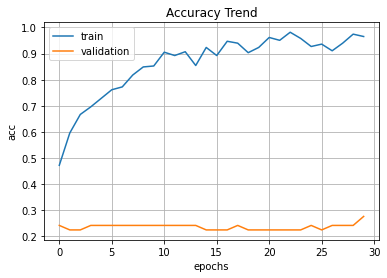

In [32]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid()
plt.legend()
plt.show()

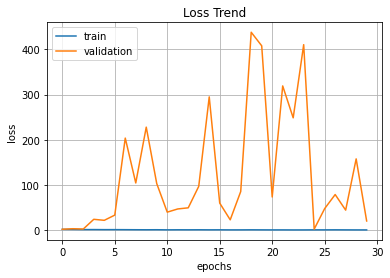

In [33]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()